In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
def read_data(train_data_path, test_data_path):
    train = pd.read_csv(train_data_path)
    test = pd.read_csv(test_data_path)
    return train,test


In [3]:
train, test = read_data("data/train.csv", "data/test.csv")

In [4]:
def transform_data(data):
    data["casual"] = 0
    data["registered"] = 0
    
    parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    data["datetime"] = data["datetime"].apply(parser)
#     dates = pd.DataFrame({"datetime" : parser(value) for value in data["datetime"]})
    data["year"]= [date.year for date in data["datetime"]]
    data["month"]= [date.month for date in data["datetime"]]
#     data["day"] = [date.day for date in data["datetime"]]
    data["hour"] = [date.hour for date in data["datetime"]]
    data = data.drop(labels=["datetime", "casual", "registered"], axis=1)
    return data

In [5]:
train_tr = transform_data(train)

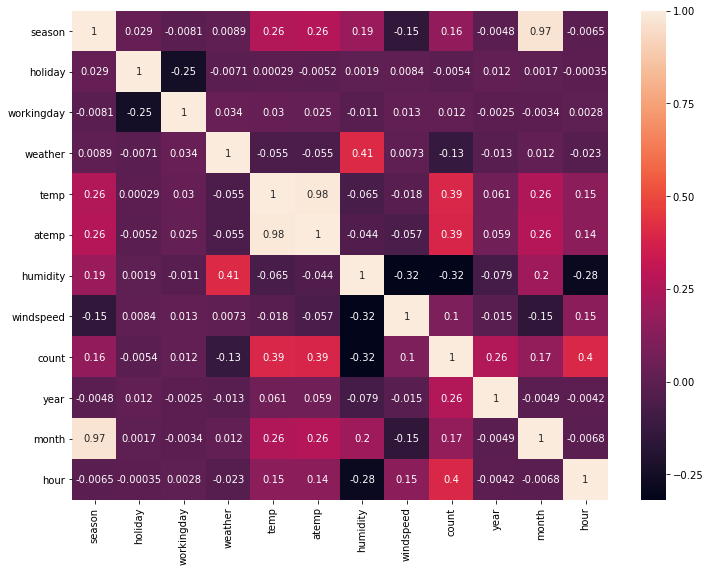

In [6]:
#correlation matrix
corrmat = train_tr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, annot = True, square=False);

In [7]:
test_tr = transform_data(test)

In [ ]:
print([ test_tr[col].value_counts() for col in test_tr.columns ])

In [12]:
y = train_tr["count"]
train_tr = train_tr.drop("count", axis=1)

In [13]:
data_to_encode = pd.concat([test_tr, train_tr], axis=0)

In [14]:
data_to_encode

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4
5,1,0,1,1,9.84,11.365,60,15.0013,2011,1,5
6,1,0,1,1,9.02,10.605,60,15.0013,2011,1,6
7,1,0,1,1,9.02,10.605,55,15.0013,2011,1,7
8,1,0,1,1,9.02,10.605,55,19.0012,2011,1,8
9,1,0,1,2,9.84,11.365,52,15.0013,2011,1,9


In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(data_to_encode)


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [17]:
from sklearn.model_selection import train_test_split
X = encoder.transform(train_tr)
X_real = encoder.transform(test_tr)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dtr = DecisionTreeRegressor().fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=2).fit(X_train, y_train)

In [29]:
dtr.score(X_train, y_train)

0.99983823728752763

In [30]:
rfr.score(X_train, y_train)

0.9885696374303593

In [31]:
dtr.score(X_test, y_test)

0.86367443785937481

In [32]:
rfr.score(X_test, y_test)

0.91008766604014424